In [219]:
%matplotlib inline
from pylab import *

In [220]:
def HdT1(S1,F,A,B,T1,epsilon):
    return S1-F-(A+B*T1)+epsilon
def HdT2(S2,alpha,a,F,A,B,T2,epsilon):
    return S2*(1-2*alpha*a)+F-(A+B*T2)+epsilon
def C(T1):
    top = T1 - 273.15
    bottom = T1 - 35.86
    fract = top / bottom
    return 6.11 * exp(17.23 * fract)
def newF(F0,gamma1,gamma2,T1,T2):
    return F0 + gamma1 * (T1 - T2) + gamma2 * C(T1) * (T1 - T2)
def newa(T1,T2,Tice):
    phiicedeg = 30 + 30 * (T1 - Tice) / (T1 - T2)
    phiicerad = phiicedeg * pi / 180.0
    return 1 - sin(phiicerad)

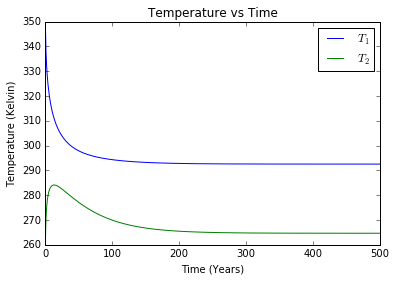

In [256]:
dt = 1.0
maxtime = 500
t = arange(0,maxtime,dt)
Tice = 271.15
H = 10
F0 = 3.0
A = -49.7
B = 0.29
alpha = 0.29
epsilon = 0.0
S1 = 40.9
S2 = 24.1
gamma1 = 0.035
gamma2 = 0.002852
T1 = zeros(maxtime)
T2 = zeros(maxtime)
T1[0] = 350.0
T2[0] = 260.0
for i in range(0,len(t)-1):
    F = newF(F0,gamma1,gamma2,T1[i],T2[i])
    a = newa(T1[i],T2[i],Tice)
    T1[i+1] = T1[i] + (HdT1(S1,F,A,B,T1[i],epsilon)) / H * dt
    T2[i+1] = T2[i] + (HdT2(S2,alpha,a,F,A,B,T2[i],epsilon)) / H * dt
plot(t,T1,label="$T_1$")
plot(t,T2,label="$T_2$")
legend(loc="best")
ylabel("Temperature (Kelvin)")
xlabel("Time (Years)")
title("Temperature vs Time")
show()

In [253]:
print(T1)

[  3.50000000e+02  -5.27446983e+04   3.03659477e+13  -1.60868678e+22
   8.52228684e+30  -4.51482376e+39   2.39180327e+48  -1.26709772e+57
   6.71266174e+65  -3.55614464e+74]


# 